In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf
from sklearn.decomposition import PCA

import qda

In [2]:
# Loading a CSV file into a DataFrame
df_void = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')
df_void_new = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_parts_new = pd.read_csv('../Processed dataset/df_new_parts.csv')

#df_parts.head(10)
df_parts_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids,Num_Wpixels,Num_Bpixels,Wpixels_ratio
0,img01.bmp,top_left,part,0,38291,4105.674,0.153,-1.268,0.760,0.743,277.925,274.667,220.802,0,41,38291,13692,0.736606
1,img01.bmp,bottom_left,part,0,37887,4155.306,0.157,-1.304,0.752,0.735,279.026,275.584,219.634,1,42,37887,14096,0.728834
2,img01.bmp,top_right,part,0,37334,4106.076,0.189,1.564,0.752,0.734,277.777,272.791,218.026,2,46,37334,14194,0.724538
3,img01.bmp,bottom_right,part,0,37868,4139.319,0.164,-1.070,0.756,0.738,277.900,274.158,219.579,3,45,37868,13661,0.734887
4,img02.bmp,top_left,part,0,36599,4223.005,0.118,-0.817,0.730,0.713,280.140,278.182,215.869,4,41,36599,15385,0.704044
5,img02.bmp,bottom_left,part,0,36382,4305.088,0.104,-0.787,0.722,0.706,280.715,279.187,215.228,5,42,36382,15602,0.699869
6,img02.bmp,top_right,part,0,36808,4366.544,0.067,-1.190,0.737,0.721,278.233,277.617,216.484,6,47,36808,14721,0.714316
7,img02.bmp,bottom_right,part,0,36903,4180.034,0.127,-0.903,0.738,0.723,279.169,276.892,216.763,7,43,36903,15081,0.709892
8,img03.bmp,top_left,part,0,37697,4124.720,0.123,-1.276,0.753,0.735,277.368,275.259,219.083,8,43,37697,14059,0.728360
9,img03.bmp,bottom_left,part,0,37626,4153.833,0.117,-0.853,0.751,0.733,277.820,275.897,218.876,9,43,37626,14130,0.726988


In [4]:
# Drop unused columns 
# Vd "Gaussian part dataset.ipynb" for details
data_part_norm = df_parts_new.drop(columns=['Orientation [radians]','Num_voids','Num_Wpixels','Solidity','Extent' ,'Num_Bpixels', 'ID','Equivalent Diameter [pixels]']) 

In [7]:
dataNum = data_part_norm.select_dtypes(include=np.number)
dataset=dataNum.drop(columns=['Part_ID']) 
dataset.head(10)

,Area [pixels],Perimeter [pixels],Eccentricity,Major Axis Length [pixels],Minor Axis Length [pixels],Wpixels_ratio
0,38291,4105.674,0.153,277.925,274.667,0.736606
1,37887,4155.306,0.157,279.026,275.584,0.728834
2,37334,4106.076,0.189,277.777,272.791,0.724538
3,37868,4139.319,0.164,277.900,274.158,0.734887
4,36599,4223.005,0.118,280.140,278.182,0.704044
5,36382,4305.088,0.104,280.715,279.187,0.699869
6,36808,4366.544,0.067,278.233,277.617,0.714316
7,36903,4180.034,0.127,279.169,276.892,0.709892
8,37697,4124.720,0.123,277.368,275.259,0.728360
9,37626,4153.833,0.117,277.820,275.897,0.726988


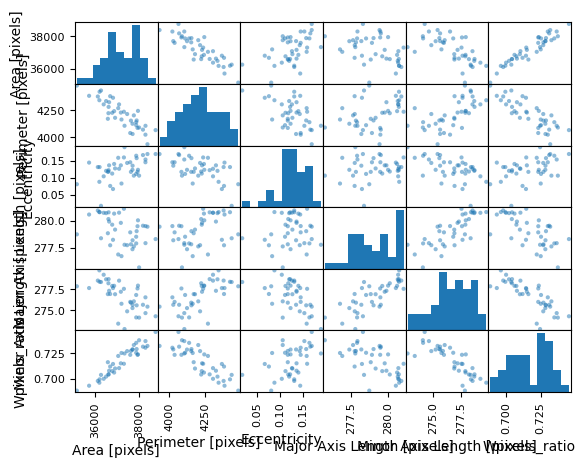

In [8]:
#Scatter plot
pd.plotting.scatter_matrix(dataset)
plt.show()

# can see some linear correlated vars and some very sparse/uncorrelated

Control charts

In [ ]:
# No need to check normality assumption again because already required in variable selection

Minor axis length

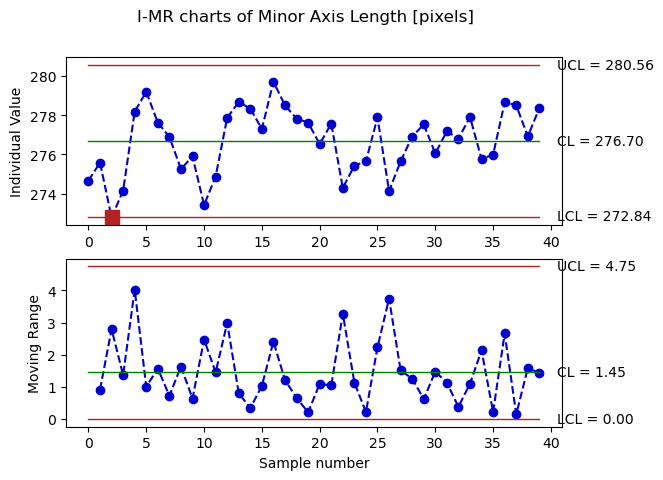

In [18]:
data=pd.DataFrame(dataset['Minor Axis Length [pixels]'])
data_IMR = qda.ControlCharts.IMR(data,'Minor Axis Length [pixels]')

Wpixels_ratio

In [ ]:
#just one seems to be out of control, but don't have appliable cause
#also not getting that out -> probably better to keep it

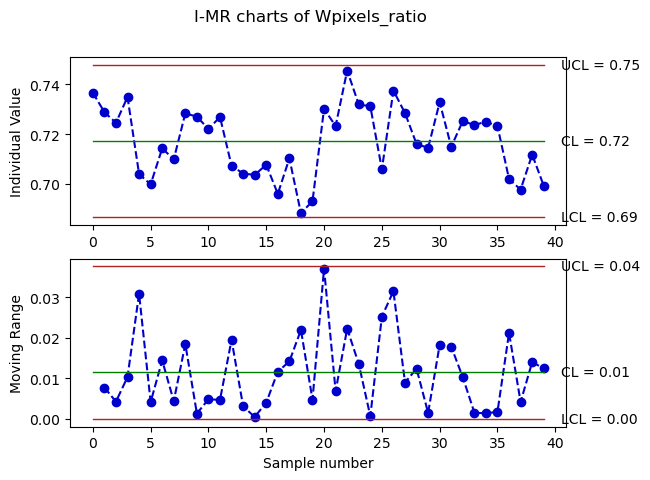

In [21]:
data=pd.DataFrame(dataset['Wpixels_ratio']) 
data_IMR = qda.ControlCharts.IMR(data,'Wpixels_ratio')

In [ ]:
#everything looks in control